## Exercise 4 - Solution

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,6]

In [67]:
# Read a CSV file into a Pandas DataFrame
PATH='data/rossmann'
store_df = pd.read_csv(f'{PATH}/store.csv')
sales_df = pd.read_csv(f'{PATH}/train.csv', dtype={'StateHoliday':np.object}, parse_dates=['Date'])

In [68]:
# Calculate CompetitionOpenSince date from month and year columns
store_df['CompetitionOpenSince'] = pd.to_datetime(dict(year=store_df.CompetitionOpenSinceYear, month=store_df.CompetitionOpenSinceMonth, day=1))

In [69]:
# Fill missing CompetitionDistance values with average value of all distances
mean = store_df.CompetitionDistance.mean()
store_df.CompetitionDistance.fillna(mean, inplace=True)

In [70]:
# Fill missing CompetitionOpenSince values with today's date
store_df.CompetitionOpenSince.fillna(pd.datetime.today(), inplace=True)

In [78]:
# Replace StateHoliday categories a, b, c with 1 and convert to int32
sales_df['StateHolidayInt'] = sales_df.StateHoliday.replace(['a','b','c'], 1)
sales_df['StateHolidayInt'] = sales_df['StateHolidayInt'].astype(np.int32)

In [79]:
# Join store type, assortment, distance and open since from store df to sales df
merged_df = pd.merge(left=sales_df, right=store_df[['Store','StoreType','Assortment','CompetitionDistance','CompetitionOpenSince']], on='Store')

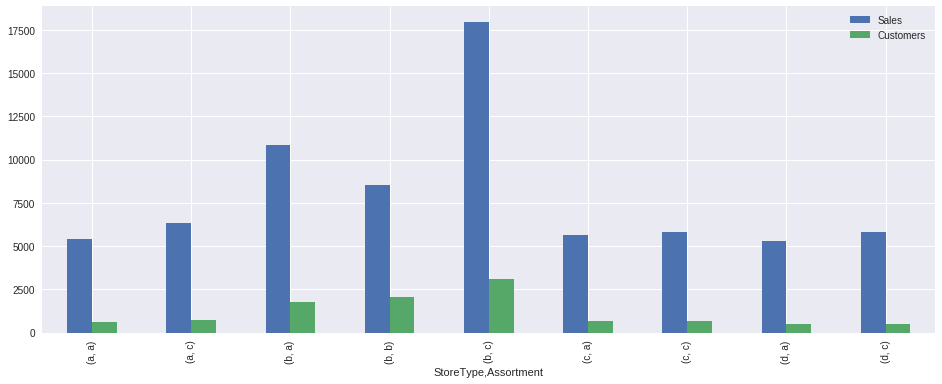

In [136]:
# Average sales and number of customers per store type
merged_df.groupby(['StoreType','Assortment'])[['Sales', 'Customers']].mean().plot.bar();

In [103]:
# Test: Categorize store type and assortment
merged_df['StoreTypeCat'] = merged_df.StoreType.astype('category').cat.codes
merged_df['AssortmentCat'] = merged_df.Assortment.astype('category').cat.codes

In [104]:
# Find correlations
merged_df.corr()

Store  DayOfWeek     Sales  Customers      Open  \
Store                1.000000  -0.000008  0.005126   0.024325 -0.000047   
DayOfWeek           -0.000008   1.000000 -0.462125  -0.386445 -0.528963   
Sales                0.005126  -0.462125  1.000000   0.894711  0.678472   
Customers            0.024325  -0.386445  0.894711   1.000000  0.616768   
Open                -0.000047  -0.528963  0.678472   0.616768  1.000000   
Promo                0.000058  -0.392925  0.452345   0.316169  0.295042   
SchoolHoliday        0.000641  -0.205388  0.085124   0.071568  0.086171   
StateHolidayInt      0.000542  -0.052889 -0.254216  -0.226608 -0.378378   
CompetitionDistance -0.026394  -0.000025 -0.019207  -0.102777  0.007981   
StoreTypeCat        -0.021604   0.000051 -0.013057  -0.141423 -0.003325   
AssortmentCat        0.004419  -0.000052  0.074941   0.007044  0.002972   

                        Promo  SchoolHoliday  StateHolidayInt  \
Store                0.000058       0.000641         0.000542   
DayOfWeek           -0.392925      -0.205388        -0.052889   
Sales                0.452345       0.085124        -0.254216   
Customers            0.316169       0.071568        -0.226608   
Open                 0.295042       0.086171        -0.378378   
Promo                1.000000       0.067483        -0.012353   
SchoolHoliday        0.067483       1.000000         0.148651   
StateHolidayInt     -0.012353       0.148651         1.000000   
CompetitionDistance  0.000138      -0.003684        -0.000784   
StoreTypeCat        -0.000299       0.000032         0.002533   
AssortmentCat        0.000294      -0.002530        -0.002755   

                     CompetitionDistance  StoreTypeCat  AssortmentCat  
Store                          -0.026394     -0.021604       0.004419  
DayOfWeek                      -0.000025      0.000051      -0.000052  
Sales                          -0.019207     -0.013057       0.074941  
Customers                      -0.102777     -0.141423       0.007044  
Open                            0.007981     -0.003325       0.002972  
Promo                           0.000138     -0.000299       0.000294  
SchoolHoliday                  -0.003684      0.000032      -0.002530  
StateHolidayInt                -0.000784      0.002533      -0.002755  
CompetitionDistance             1.000000      0.078070       0.146382  
StoreTypeCat                    0.078070      1.000000       0.232862  
AssortmentCat                   0.146382      0.232862       1.000000

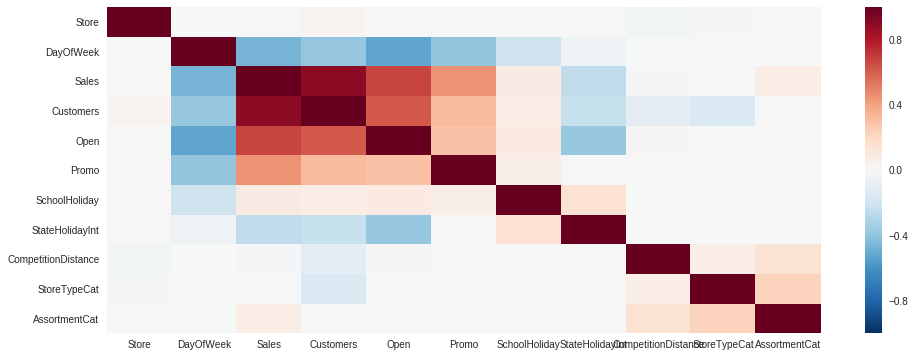

In [105]:
# Plot a correlation heatmap
sns.heatmap(merged_df.corr());